In [1]:
### computational python libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils

from tensorflow.contrib import rnn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
##read training datasets
buffer=pd.DataFrame()
for i in range(2,6):
    
    subject_01 = pd.read_csv('orginal_dataset/P_0{0}_win_1000.csv'.format(i))
    buffer=pd.concat([buffer,subject_01],axis=0)
### here we read validiation set of subject_20
    subject_8 = pd.read_csv('orginal_dataset/P_06_win_1000.csv')




MemoryError: 

In [1]:

def getdata(X):
    ### drop the label columm to assign data for testingset(train_x) set    
    train_x = X.drop('Label',axis=1)
    
   
    df=train_x
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    train_x = np.asarray(result)

    train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],1)

    #### here we convert labelled_row data(eg:high_stress,medium_stress,mild_stress) in to int or float using label encoder function
   
    train_yy = X['Label']
    encoder = LabelEncoder()

    ### encoded for train_y data set 
    encoder.fit(train_yy)
    encoded_train_ylabel = encoder.transform(train_yy)
    train_y = np_utils.to_categorical(encoded_train_ylabel)
    print(train_y.shape)
    return(train_x,train_y)

    

In [2]:
### train data set for model
train_x1,train_y1 = getdata(X=buffer)
### test data set  for model

test_x,test_y = getdata(X=subject_8)
print(train_y1.shape)

NameError: name 'buffer' is not defined

In [8]:
import keras
def LSTM_RNN_vx(train_xx,train_yy,test_xx,test_yy,units,epoch,batch_size,inputshape,lr):
    #Modeling RNN-LSTM
        model=tf.keras.Sequential()
        model.add(tf.keras.layers.LSTM (units,activation = 'tanh',input_shape =inputshape, return_sequences = False))
        #model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(128,activation='relu'))
        model.add(tf.keras.layers.Dense(64,activation='relu'))
        model.add(tf.keras.layers.Dense(30,activation='relu'))
        model.add(tf.keras.layers.Dense(3,activation='sigmoid'))
        #adagrad=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
       
        model.compile(loss = 'categorical_crossentropy', optimizer = "rmsprop" ,metrics=['acc'])
        hist=model.fit(train_xx,train_yy,epochs=epoch,batch_size=batch_size,shuffle=True,validation_data=(test_xx,test_yy))
        Y_pred=model.predict(test_xx)
        return hist,Y_pred,model

In [9]:
hist,Y_pred,model = LSTM_RNN_vx(train_xx= train_x1 ,train_yy=train_y1,test_xx=test_x,test_yy=test_y,units=10,epoch=30,batch_size=500,inputshape=(1000,1),lr=0.01)



Train on 256350 samples, validate on 78275 samples
Epoch 1/30
256350/256350 [==============================] - 748s 3ms/step - loss: 1.0224 - acc: 0.4526 - val_loss: 1.1543 - val_acc: 0.4700
Epoch 2/30
256350/256350 [==============================] - 479s 2ms/step - loss: 0.9073 - acc: 0.5386 - val_loss: 1.0703 - val_acc: 0.4812
Epoch 3/30
256350/256350 [==============================] - 465s 2ms/step - loss: 0.8618 - acc: 0.5666 - val_loss: 1.5965 - val_acc: 0.4572
Epoch 4/30
256350/256350 [==============================] - 461s 2ms/step - loss: 0.8279 - acc: 0.6026 - val_loss: 2.1700 - val_acc: 0.4196
Epoch 5/30
256350/256350 [==============================] - 464s 2ms/step - loss: 0.8027 - acc: 0.6195 - val_loss: 1.9695 - val_acc: 0.4147
Epoch 6/30
256350/256350 [==============================] - 463s 2ms/step - loss: 0.7807 - acc: 0.6266 - val_loss: 1.9691 - val_acc: 0.4004
Epoch 7/30
256350/256350 [==============================] - 467s 2ms/step - loss: 0.7489 - acc: 0.6383 - val_

In [17]:
model.save('saved/optimizer_sigmoid_1layer/intial1.h5')

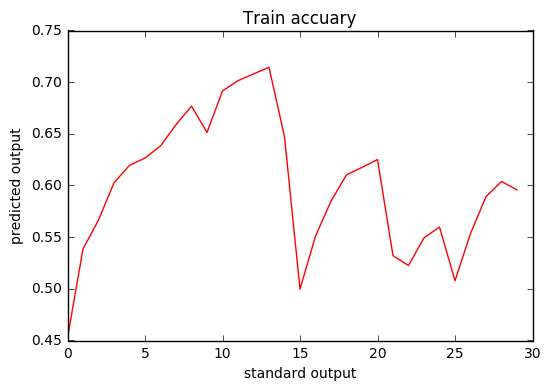

In [22]:

import matplotlib.pyplot as plt
###  accuray plot for training set
fig = plt.figure()
plt.plot(hist.history['acc'],color = 'red')
plt.legend
plt.title('Train accuary')
plt.xlabel('standard output')
plt.ylabel('predicted output')
plt.show()
fig.savefig('plots/bestmodel_train_acc.png',format='png')
plt.close()

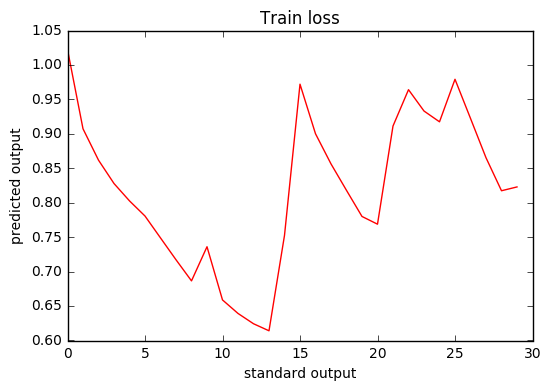

In [23]:
###  accuray plot for training set
from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'red')
plt.legend
plt.title('Train loss')
plt.xlabel('standard output')
plt.ylabel('predicted output')
plt.show()
fig.savefig('plots/bestmodel_train_loss.png',format='png')
plt.close()

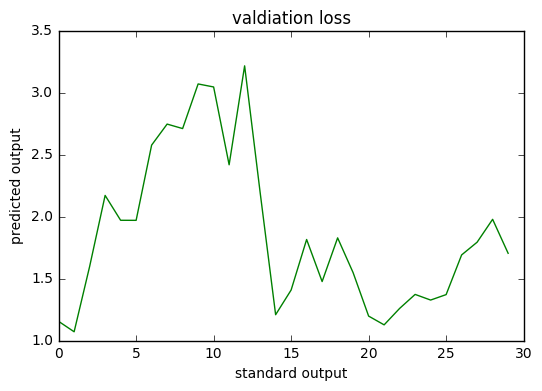

In [24]:
### loss error for test set or (vadiation set)
fig = plt.figure()
plt.plot(hist.history['val_loss'],color = 'g')
plt.legend
plt.title('valdiation loss')
plt.xlabel('standard output')
plt.ylabel('predicted output')
plt.show()
fig.savefig('plots/bestmodel_valdiation_loss.png',format='png')
plt.close()

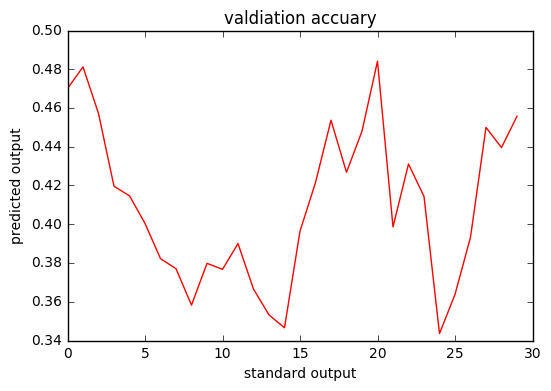

In [25]:
### accuray plot for vadiation set
fig = plt.figure()
plt.plot(hist.history['val_acc'],color = 'red')
plt.legend
plt.title('valdiation accuary')
plt.xlabel('standard output')
plt.ylabel('predicted output')
plt.show()
fig.savefig('plots/bestmodel_valdiation_acc.png',format='png')
plt.close()

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [27]:
pred_class = pd.DataFrame(Y_pred,columns=['mild_stress','medium_stress','high_stress'])
pred_class['label']=pred_class.idxmax(axis=1)

In [28]:
test_class = pd.DataFrame(test_y,columns=['mild_stress','medium_stress','high_stress'])
test_class['label']= test_class.idxmax(axis=1)

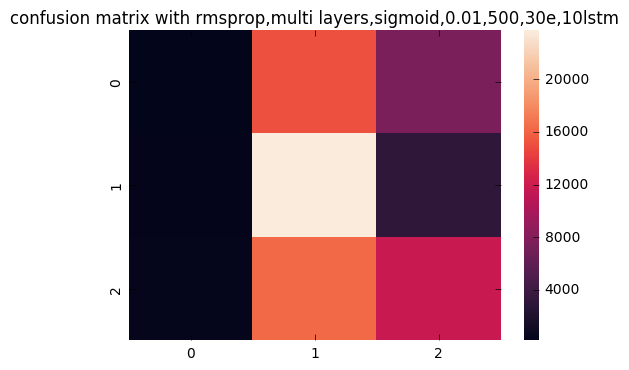

In [30]:
cm=confusion_matrix(test_class['label'],pred_class['label'])
sn.heatmap(cm)
plt.title('confusion matrix with rmsprop,multi layers,sigmoid,0.01,500,30e,10lstm')
plt.savefig('plots/bestmodel_cofusion_matrix.png')
plt.show()